Step 1. 스티커 구하기 or 만들기
Step 2. 얼굴 검출 & 랜드마크 검출 하기
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요
Step 3. 스티커 적용 위치 확인하기
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.
Step 4. 스티커 적용하기
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.
Step 5. 문제점 찾아보기
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

### step2. 얼굴 검출 & 랜드마크 검출 하기 

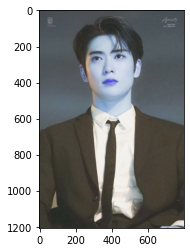

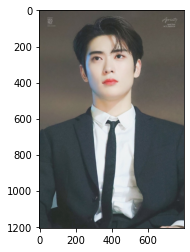

rectangles[[(260, 201) (527, 468)]]


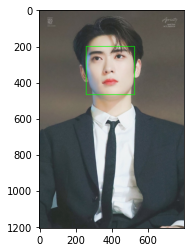

In [112]:
import os
import cv2 #opencv
import matplotlib.pyplot as plt
import numpy as np
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()
#opencv특징 때문에 색상이 다르게 출력된다. BGR을 사용한다. opencv에서 다룬 이미지를 라이브러리를 통해 
#출력할려면 색깔 보정을 해주어야 한다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
#색을 보정해주는 과정이다

#object 기술을 이용해서 얼굴의 위치를 찾는다.  dlib의 face detector는
# HOG, SVM 을 사용해서 얼굴을 찾는다.

detector_hog = dlib.get_frontal_face_detector() 
#dlib을 활용하여 hot detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #color 변환함수
dlib_rects = detector_hog(img_rgb, 1)  
#detector_hog을 활용해서 boundingbox 출력하기

#찾은 화면 출력하기
print(dlib_rects)   
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

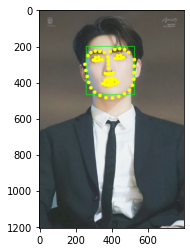

In [113]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()



### Step 3. 스티커 적용 위치 확인하기 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

In [114]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0] -133
    y = landmark[33][1] -133
    
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(387, 353)
(x,y) : (254,220)
(w,h) : (268,268)


### Step 4. 스티커 적용하기

In [115]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(268, 268, 3)


In [116]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
        np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

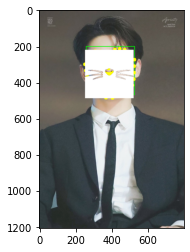

In [117]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

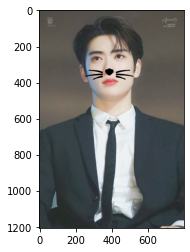

In [118]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 회고
- 이번 프로젝트에서 **어려웠던 점,**   
처음에 이미지의 좌표의 기준점을 찾는 부분에서 어려웠습니다. 나중에 보니 x,y 는 이미지의 left, top 기준이라는 것을 알게 되었습니다.
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.  
이미지 좌표를 보는법을 알게 되었습니다.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.]  
처음 face rectangular 의 가로, 세로 길이, 고양이 이미지의 가로, 세로 길이 기준으로 찾기 시작했습니다. 
face rectangular의 변 길이는 267, 고양이 이미지 가로길이는 268로 거의 비슷하였습니다. 그래서 이미지 사이즈를 조절하지 않고 코 좌표 기준으로 267/2 길이 많큼 x,y 좌표 기준으로 빼기는 진행하여 이미지를 맞출 수 있었습니다.
- **자기 다짐**  
아직 파이썬 코드의 이해가 부족하기 때문에 프로젝트를 진행하는데 어려움이 많아 코드를 더 많이 읽어서 눈에 익히고 잘 읽을 수 있도록 노력하여야 겠습니다.